In [1]:
import os
import sys
stae_path = os.path.expanduser("~/Dropbox/code/publications") # use appropriate path to source code
module_path = os.path.abspath(os.path.join(stae_path))
sys.path.append(module_path)

import numpy as np
from matplotlib import pyplot as plt

from stae.coupled_map_lattices import map_lattice, circle_map
from stae.local_causal_states import LocalCausalStates, chi_squared
from stae.visuals import diagram

### Create map lattice spacetime field

first 300 time steps removed as transients

In [2]:
np.random.seed(18)
initial = np.random.rand(20000)
target_field = map_lattice(initial, 600, circle_map, coupling=1.0, nonlinearity=1.0)[300:]

### Parameters

In [3]:
p_depth = 6
f_depth = 1
c = 1
K_past = 10
K_future = 40
p_decay = 0.0
f_decay = 0.0
past_params = {'nClusters':K_past, 'maxIterations':200}
future_params = {'nClusters':K_future, 'maxIterations':200}
dist_metric = chi_squared

### Create model, run inference, forecast, and reconstruct

last 100 time steps removed from the map lattice spacetime field to be a ground truth, which the 100 time step forecast will be compared against

In [4]:
np.random.seed(18)
infer_field = target_field[:-100] # don't use last 100 time steps for inference
model = LocalCausalStates(p_depth, f_depth, c)
model.infer(infer_field, past_params, future_params, past_decay=p_decay, future_decay=f_decay, boundary_condition='periodic')
training_time = len(model.state_field)
forecast_start = training_time - f_depth # for visuals 
model.forecast(100)
model.reconstruct_field()

### Visualize results

making separate diagrams for training (before T = 199) and forecasting (after T = 199)

### First, the Local Causal State field

In [5]:
space_start = 1400
window = 250

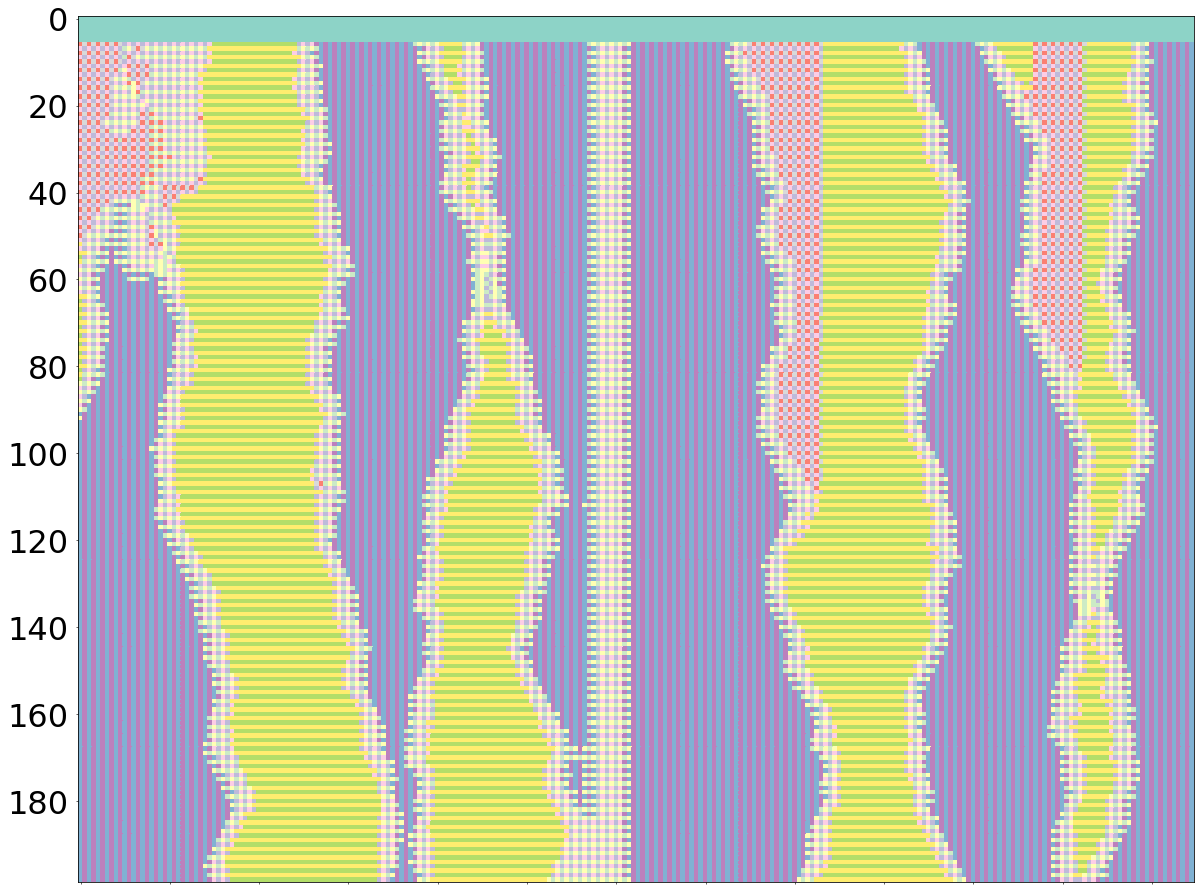

In [35]:
sfield = model.state_field[:,space_start:space_start+window]
ax = diagram(sfield, cmap=plt.cm.Set3, size=20, 
        y_min=0, y_max=forecast_start,
        xtick_spacing=20, ytick_spacing=20, tick_size=32)
ax.set_xticklabels([], fontsize=0, minor=True)
# plt.savefig('state_field_a.pdf', bbox_inches='tight')

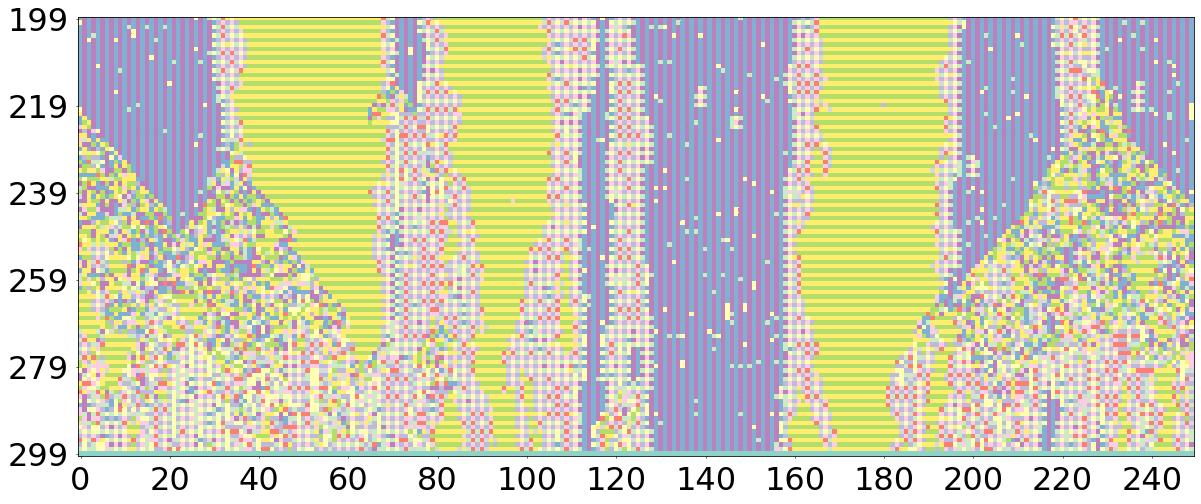

In [36]:
sfield = model.state_field[:,space_start:space_start+window]
diagram(sfield, cmap=plt.cm.Set3, size=20, 
        y_min=forecast_start,
        xtick_spacing=20, ytick_spacing=20, tick_size=32)
# plt.savefig('state_field_b.pdf', bbox_inches='tight')

### Next, the reconstructed observable field

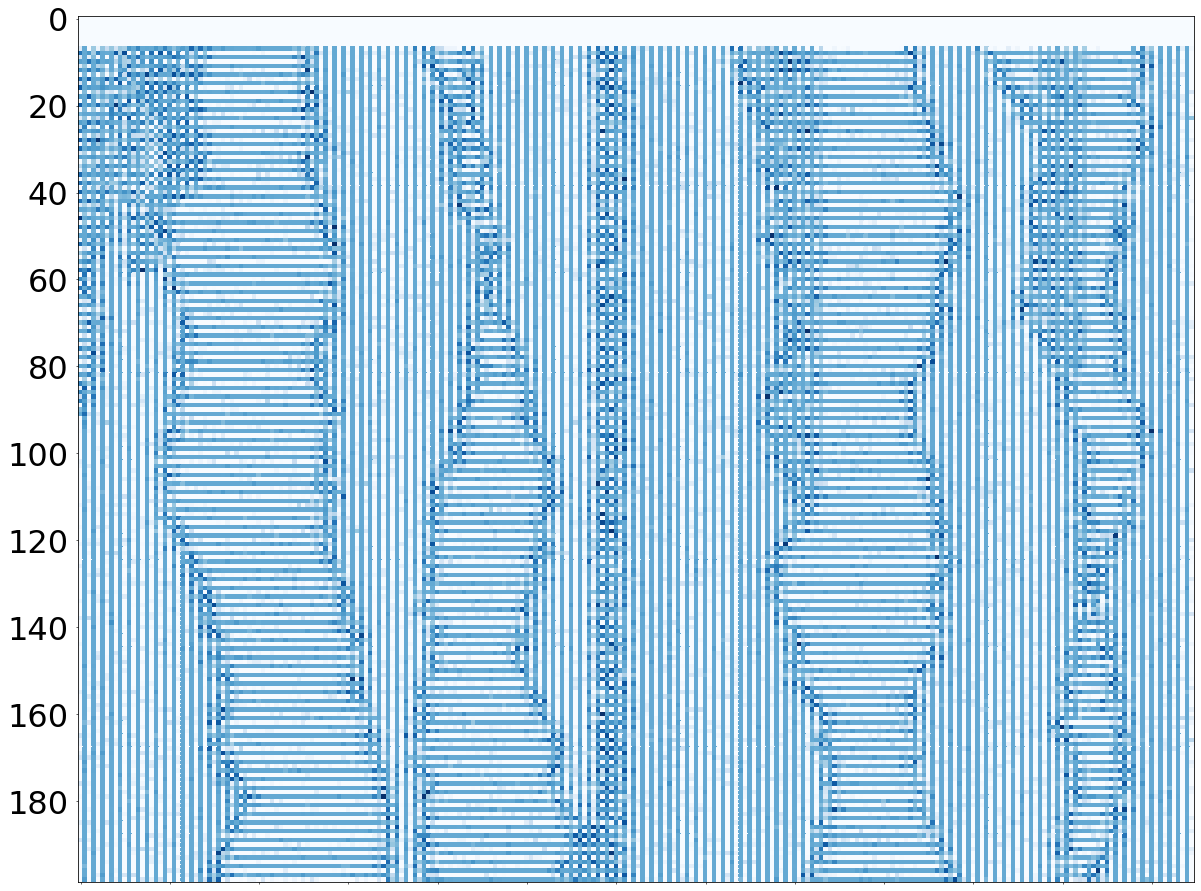

In [37]:
rfield = model.reconstructed_field[:,space_start:space_start+window]
ax = diagram(rfield, cmap=plt.cm.Blues, size=20, 
        y_min=0, y_max=forecast_start,
        xtick_spacing=20, ytick_spacing=20, tick_size=32)
ax.set_xticklabels([], fontsize=0, minor=True)
# plt.savefig('reconstr_field_a.pdf', bbox_inches='tight')

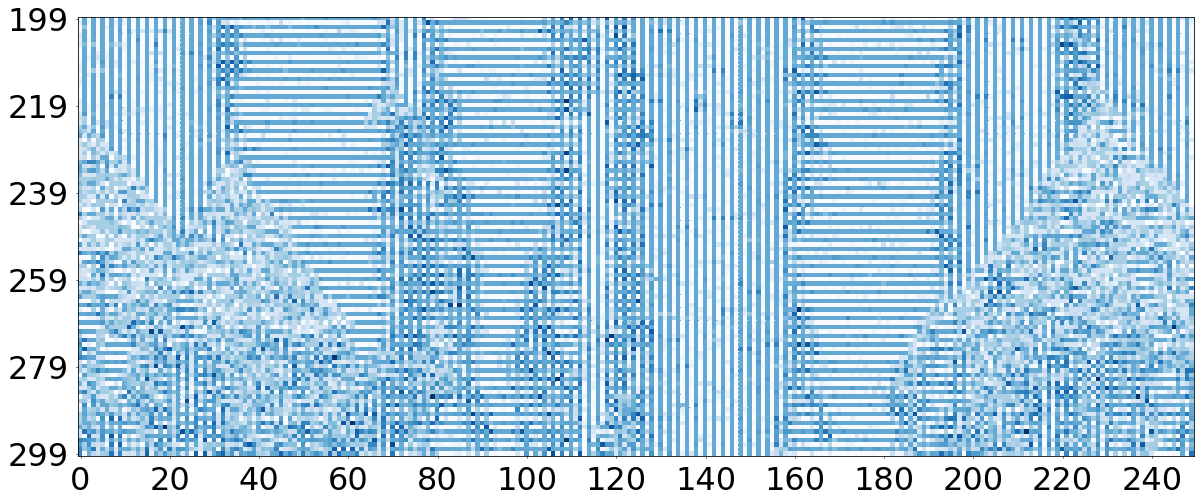

In [38]:
rfield = model.reconstructed_field[:,space_start:space_start+window]
diagram(rfield, cmap=plt.cm.Blues, size=20, 
        y_min=forecast_start,
        xtick_spacing=20, ytick_spacing=20, tick_size=32)
# plt.savefig('reconstr_field_b.pdf', bbox_inches='tight')

### Finally, the ground-truth observable field

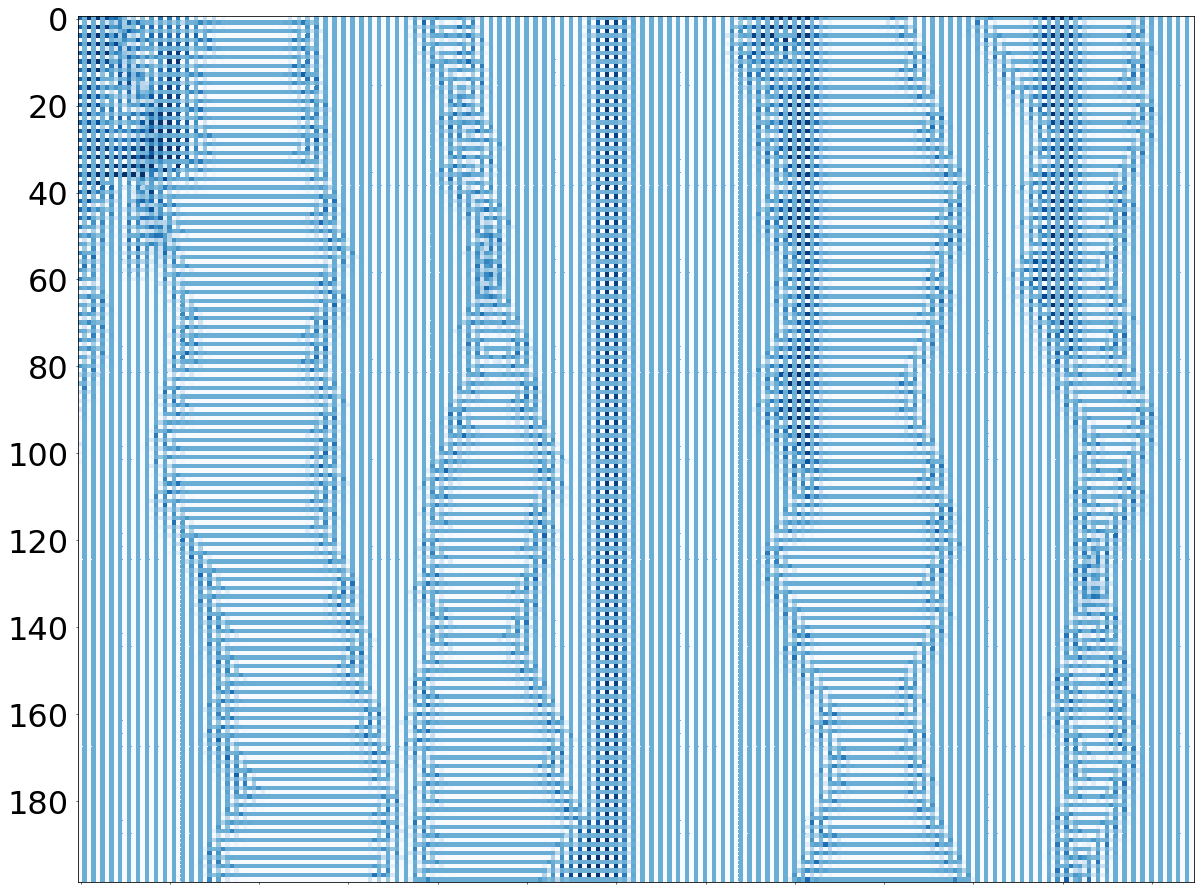

In [39]:
ofield = target_field[:,space_start:space_start+window]
ax = diagram(ofield, cmap=plt.cm.Blues, size=20, 
        y_min=0, y_max=forecast_start,
        xtick_spacing=20, ytick_spacing=20, tick_size=32)
ax.set_xticklabels([], fontsize=0, minor=True)
# plt.savefig('observ_field_a.pdf', bbox_inches='tight')

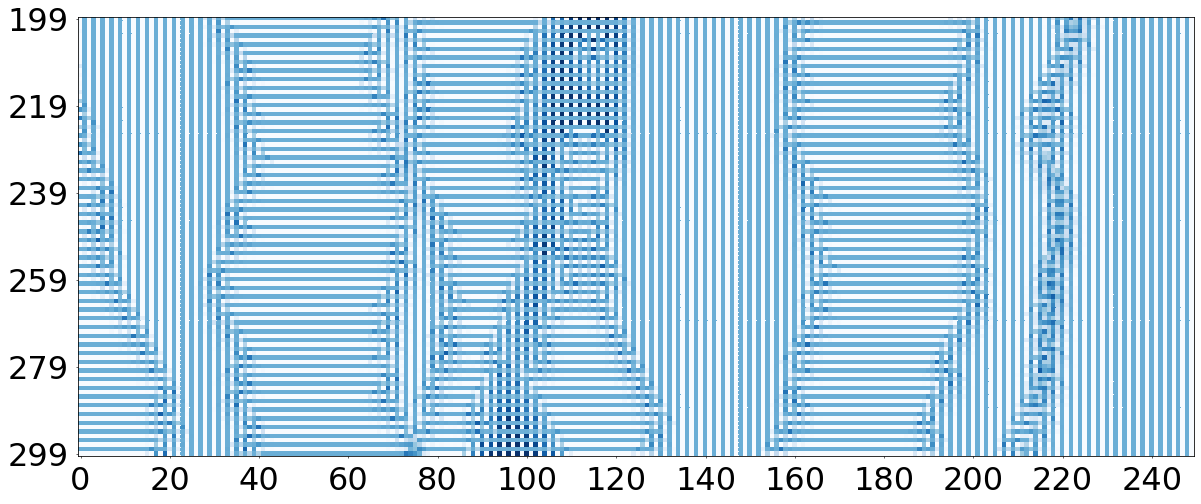

In [40]:
ofield = target_field[:,space_start:space_start+window]
diagram(ofield, cmap=plt.cm.Blues, size=20, 
        y_min=forecast_start,
        xtick_spacing=20, ytick_spacing=20, tick_size=32)
# plt.savefig('observ_field_b.pdf', bbox_inches='tight')